In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

**Author: Giuseppe Vescina**

## Introduction

This exploratory data analysis investigates potential correlations between two critical social issues: **youth crime** and **children missing education (CME)** in London. By examining data from diverse London boroughs, this study aims to uncover patterns that could inform policy decisions and targeted interventions.

### Datasets Overview

1. **Youth Crime Data:**
   - **Source:** [Stop and Search data](https://data.police.uk/data/) from various London boroughs.
   - **Description:** This dataset includes incidents of youth crime documented during police stop and search operations. The analysis focuses on identifying trends and correlations with educational disruptions among the youth.

2. **Children Missing Education Data:**
   - **Source:** [Children Missing Education Statistics](https://explore-education-statistics.service.gov.uk/find-statistics/children-missing-education/2022-23)
   - **Description:** This dataset provides detailed insights into children of compulsory school age (5 to 16 years) who are missing from the education system under the criteria outlined in Section 436A of the Education Act 1996. The data covers children who are:
     - Not registered at any school.
     - Not receiving suitable education outside school.
     - Awaiting school placements.
     - Receiving unsuitable education.
     - Being supported by local authorities for placement into suitable educational settings.
   - **Time Period:** 2022/23, from the Autumn term (September) to the Summer term (July).

### Objectives

The primary objectives of this analysis are to:
- Explore the relationship between the incidence of youth crime and the prevalence of children missing education in London boroughs.
- Identify any significant trends or patterns that could help in understanding the impact of educational engagement on youth behavior.


In [51]:
stop_and_search = pd.read_csv("../data/metropolitan-stop-and-search-merged.csv")
cme = pd.read_csv("../data/cme_census.csv")

In [52]:
cme

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,old_la_code,new_la_code,la_name,cme_census_date
0,202223,Autumn term,National,E92000001,England,NaN,NaN,NaN,NaN,NaN,24700
1,202223,Autumn term,Regional,E92000001,England,E12000001,North East,NaN,NaN,NaN,470
2,202223,Autumn term,Regional,E92000001,England,E12000002,North West,NaN,NaN,NaN,3200
3,202223,Autumn term,Regional,E92000001,England,E12000003,Yorkshire and The Humber,NaN,NaN,NaN,3710
4,202223,Autumn term,Regional,E92000001,England,E12000004,East Midlands,NaN,NaN,NaN,4710
...,...,...,...,...,...,...,...,...,...,...,...
485,202223,Summer term,Local authority,E92000001,England,E13000002,Outer London,315.0,E09000024,Merton,80
486,202223,Summer term,Local authority,E92000001,England,E13000002,Outer London,317.0,E09000026,Redbridge,70
487,202223,Summer term,Local authority,E92000001,England,E13000002,Outer London,318.0,E09000027,Richmond upon Thames,20
488,202223,Summer term,Local authority,E92000001,England,E13000002,Outer London,319.0,E09000029,Sutton,50


In [16]:
stop_and_search

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2021-03-31T23:01:00+00:00,False,NaN,51.500886,-0.068284,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
1,Person search,2021-03-31T23:01:00+00:00,False,NaN,51.500886,-0.068284,Male,10-17,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
2,Person search,2021-03-31T23:01:00+00:00,False,NaN,51.500886,-0.068284,Male,NaN,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
3,Person search,2021-03-31T23:03:00+00:00,False,NaN,51.378427,-0.102657,Male,25-34,Black/African/Caribbean/Black British - Any ot...,Black,Criminal Justice and Public Order Act 1994 (se...,Anything to threaten or harm anyone,A no further action disposal,NaN,NaN
4,Person search,2021-03-31T23:04:00+00:00,False,NaN,51.605538,0.215400,Male,25-34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384596,Person and Vehicle search,2023-12-31T23:50:00+00:00,False,NaN,51.379422,-0.113034,Male,18-24,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,NaN,NaN
384597,Person search,2023-12-31T23:55:00+00:00,False,NaN,51.574014,0.178623,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,NaN,NaN
384598,Person search,2023-12-31T23:55:00+00:00,False,NaN,51.427578,-0.168030,Male,over 34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
384599,Person search,2023-12-31T23:59:00+00:00,False,NaN,51.575476,-0.436417,Male,18-24,Asian/Asian British - Bangladeshi,Asian,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,NaN,NaN


Before diving into the analysis, we will clean and preprocess the datasets to ensure that the data aligns with our objectives.


In [17]:
boroughs = [
    "Barking and Dagenham",
    "Barnet",
    "Bexley",
    "Brent",
    "Bromley",
    "Camden",
    "Croydon",
    "Ealing",
    "Enfield",
    "Greenwich",
    "Hackney",
    "Hammersmith and Fulham",
    "Haringey",
    "Harrow",
    "Havering",
    "Hillingdon",
    "Hounslow",
    "Islington",
    "Kensington and Chelsea",
    "Kingston upon Thames",
    "Lambeth",
    "Lewisham",
    "Merton",
    "Newham",
    "Redbridge",
    "Richmond upon Thames",
    "Southwark",
    "Sutton",
    "Tower Hamlets",
    "Waltham Forest",
    "Wandsworth",
    "Westminster"
]

geolocator = Nominatim(user_agent="eda_geolocator")
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

def get_borough(lat, lon):
    if pd.notna(lat) and pd.notna(lon):
        location = geocode((lat, lon), language='en')
        if location:
            address = location.address
            # Split the address to find the borough name, adjust the split as necessary
            for b in boroughs:
                if b in address:
                    return b
    return None

In [72]:
filtered_cme = cme[cme['la_name'].isin(boroughs)]

filtered_cme.reset_index(drop=True, inplace=True)

def is_convertible_to_int(val):
    try:
        int(val)  # Try to convert to integer
        return True
    except ValueError:
        return False

# Apply this function to the 'cme_census_date' column to create a mask of rows to keep
mask = filtered_cme['cme_census_date'].apply(is_convertible_to_int)
filtered_cme = filtered_cme[mask]
filtered_cme.rename(columns={'la_name': 'Borough'}, inplace=True)
filtered_cme


,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,old_la_code,new_la_code,Borough,cme_census_date
0,202223,Autumn term,Local authority,E92000001,England,E13000001,Inner London,202.0,E09000007,Camden,10
2,202223,Autumn term,Local authority,E92000001,England,E13000001,Inner London,205.0,E09000013,Hammersmith and Fulham,10
3,202223,Autumn term,Local authority,E92000001,England,E13000001,Inner London,206.0,E09000019,Islington,20
4,202223,Autumn term,Local authority,E92000001,England,E13000001,Inner London,207.0,E09000020,Kensington and Chelsea,20
6,202223,Autumn term,Local authority,E92000001,England,E13000001,Inner London,209.0,E09000023,Lewisham,10
...,...,...,...,...,...,...,...,...,...,...,...
91,202223,Summer term,Local authority,E92000001,England,E13000002,Outer London,315.0,E09000024,Merton,80
92,202223,Summer term,Local authority,E92000001,England,E13000002,Outer London,317.0,E09000026,Redbridge,70
93,202223,Summer term,Local authority,E92000001,England,E13000002,Outer London,318.0,E09000027,Richmond upon Thames,20
94,202223,Summer term,Local authority,E92000001,England,E13000002,Outer London,319.0,E09000029,Sutton,50


In [39]:
# We create a filtered stop and search dataset
stop_and_search['Date'] = pd.to_datetime(stop_and_search['Date']).dt.tz_localize(None)

# Filter the dataset for the age range "10-17"
filtered_stop_and_search = stop_and_search[stop_and_search['Age range'] == "10-17"]

# Defining the date range so it aligns with school datasets
start_date = pd.Timestamp('2022-09-01')
end_date = pd.Timestamp('2023-07-31')

# Filter the data between September 2022 and July 2023
filtered_stop_and_search = filtered_stop_and_search[(filtered_stop_and_search['Date'] >= start_date) & (filtered_stop_and_search['Date'] <= end_date)]
filtered_stop_and_search.reset_index(drop=True, inplace=True)
filtered_stop_and_search['Date'] = pd.to_datetime(filtered_stop_and_search['Date'])
filtered_stop_and_search

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2022-09-01 00:20:00,False,NaN,51.536350,-0.090113,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Evidence of offences under the Act,A no further action disposal,NaN,NaN
1,Person search,2022-09-01 02:14:00,False,NaN,51.522700,-0.078576,Male,10-17,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN
2,Person search,2022-09-01 02:30:00,False,NaN,NaN,NaN,Male,10-17,Asian/Asian British - Bangladeshi,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN
3,Person search,2022-09-01 04:00:00,False,NaN,51.516178,-0.131904,Male,10-17,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,NaN
4,Person search,2022-09-01 04:20:00,False,NaN,51.516178,-0.131904,Male,10-17,Black/African/Caribbean/Black British - African,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,Person search,2023-07-30 18:17:00,False,NaN,NaN,NaN,Male,10-17,Other ethnic group - Not stated,Asian,Police and Criminal Evidence Act 1984 (section 1),Evidence of offences under the Act,Arrest,NaN,NaN
15992,Person search,2023-07-30 21:00:00,False,NaN,51.528766,-0.202551,Male,10-17,Other ethnic group - Any other ethnic group,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
15993,Person search,2023-07-30 22:00:00,False,NaN,51.464638,-0.079317,Male,10-17,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN
15994,Person search,2023-07-30 22:22:00,False,NaN,51.400795,-0.251406,Male,10-17,Other ethnic group - Not stated,Asian,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,NaN


In [20]:
#This code was used to add a Borough column that based on Latitude and Longitude

#filtered_stop_and_search['Borough'] = filtered_stop_and_search.apply(
 #   lambda row: get_borough(row['Latitude'], row['Longitude']),
  #  axis=1
#)

#filtered_stop_and_search['Borough'] = filtered_stop_and_search['Borough'].fillna("Unknown")

#filtered_stop_and_search.to_csv('filtered_stop_and_search.csv', index=False)

In [70]:
def assign_term(date):
    if pd.Timestamp('2022-09-01') <= date <= pd.Timestamp('2022-12-16'):
        return "Autumn term"  # Autumn Term 2022
    elif pd.Timestamp('2023-01-03') <= date <= pd.Timestamp('2023-03-31'):
        return "Spring term"  # Spring Term 2023
    elif pd.Timestamp('2023-04-17') <= date <= pd.Timestamp('2023-07-21'):
        return "Summer term"  # Summer Term 2023
    else:
        return "Out of term"  # Dates that do not fall within the defined terms
    
# Apply the function to the 'Date' column to create a new 'time_identifier' column
filtered_stop_and_search['Date'] = pd.to_datetime(filtered_stop_and_search['Date'])
filtered_stop_and_search['time_identifier'] = filtered_stop_and_search['Date'].apply(assign_term)
filtered_stop_and_search
filtered_stop_and_search.to_csv('filtered_stop_and_search.csv', index=False)

In [71]:
filtered_stop_and_search = pd.read_csv("../data/filtered_stop_and_search.csv")
filtered_stop_and_search

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Borough,time_identifier
0,Person search,2022-09-01 00:20:00,False,NaN,51.536350,-0.090113,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Evidence of offences under the Act,A no further action disposal,NaN,NaN,Islington,Autumn term
1,Person search,2022-09-01 02:14:00,False,NaN,51.522700,-0.078576,Male,10-17,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,Hackney,Autumn term
2,Person search,2022-09-01 02:30:00,False,NaN,NaN,NaN,Male,10-17,Asian/Asian British - Bangladeshi,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,Unknown,Autumn term
3,Person search,2022-09-01 04:00:00,False,NaN,51.516178,-0.131904,Male,10-17,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,NaN,Islington,Autumn term
4,Person search,2022-09-01 04:20:00,False,NaN,51.516178,-0.131904,Male,10-17,Black/African/Caribbean/Black British - African,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,NaN,Islington,Autumn term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,Person search,2023-07-30 18:17:00,False,NaN,NaN,NaN,Male,10-17,Other ethnic group - Not stated,Asian,Police and Criminal Evidence Act 1984 (section 1),Evidence of offences under the Act,Arrest,NaN,NaN,Unknown,Out of term
15992,Person search,2023-07-30 21:00:00,False,NaN,51.528766,-0.202551,Male,10-17,Other ethnic group - Any other ethnic group,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,Unknown,Out of term
15993,Person search,2023-07-30 22:00:00,False,NaN,51.464638,-0.079317,Male,10-17,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,Southwark,Out of term
15994,Person search,2023-07-30 22:22:00,False,NaN,51.400795,-0.251406,Male,10-17,Other ethnic group - Not stated,Asian,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,NaN,Kingston upon Thames,Out of term


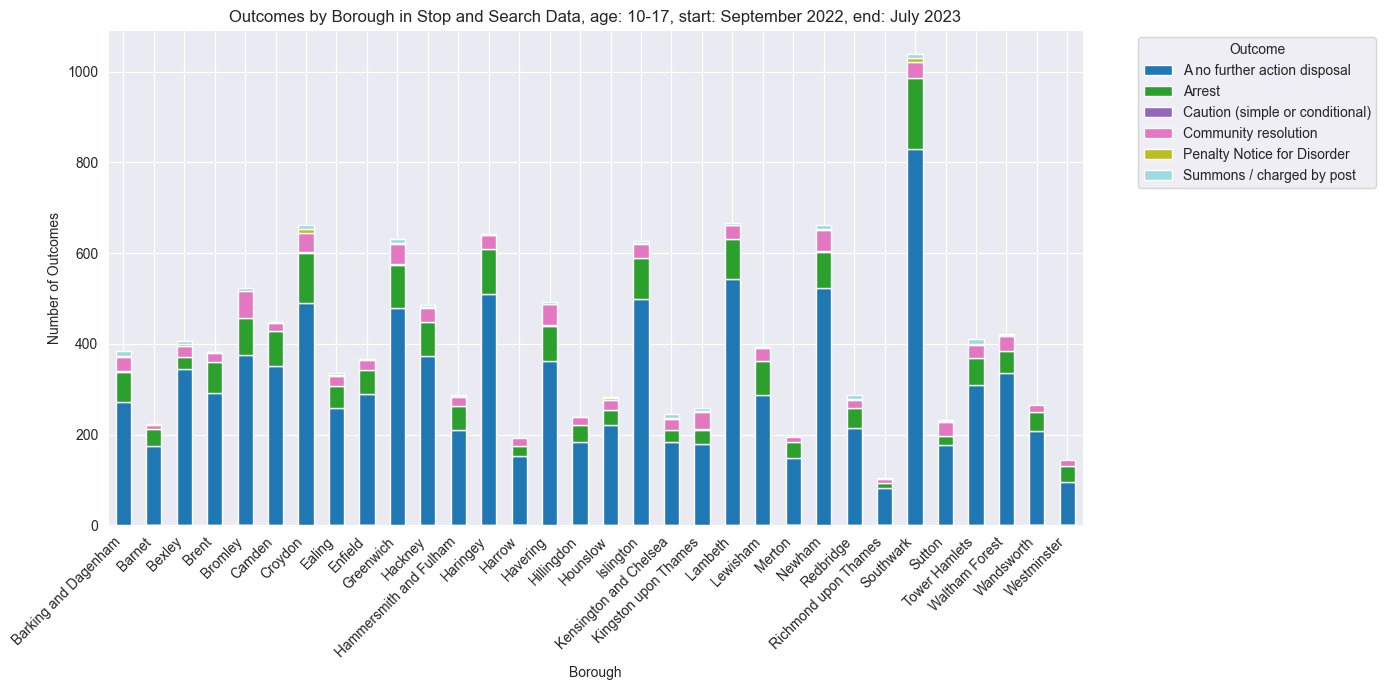

In [58]:
# Group the data by 'Borough' and 'Outcome', then count each group
grouped_data = filtered_stop_and_search.groupby(['Borough', 'Outcome']).size().unstack(fill_value=0)
grouped_data = grouped_data.drop('Unknown')
    
grouped_data.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')

# Adding titles and labels
plt.title('Outcomes by Borough in Stop and Search Data, age: 10-17, start: September 2022, end: July 2023')
plt.xlabel('Borough')
plt.ylabel('Number of Outcomes')
plt.xticks(rotation=45, ha='right') 

plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 

plt.show()

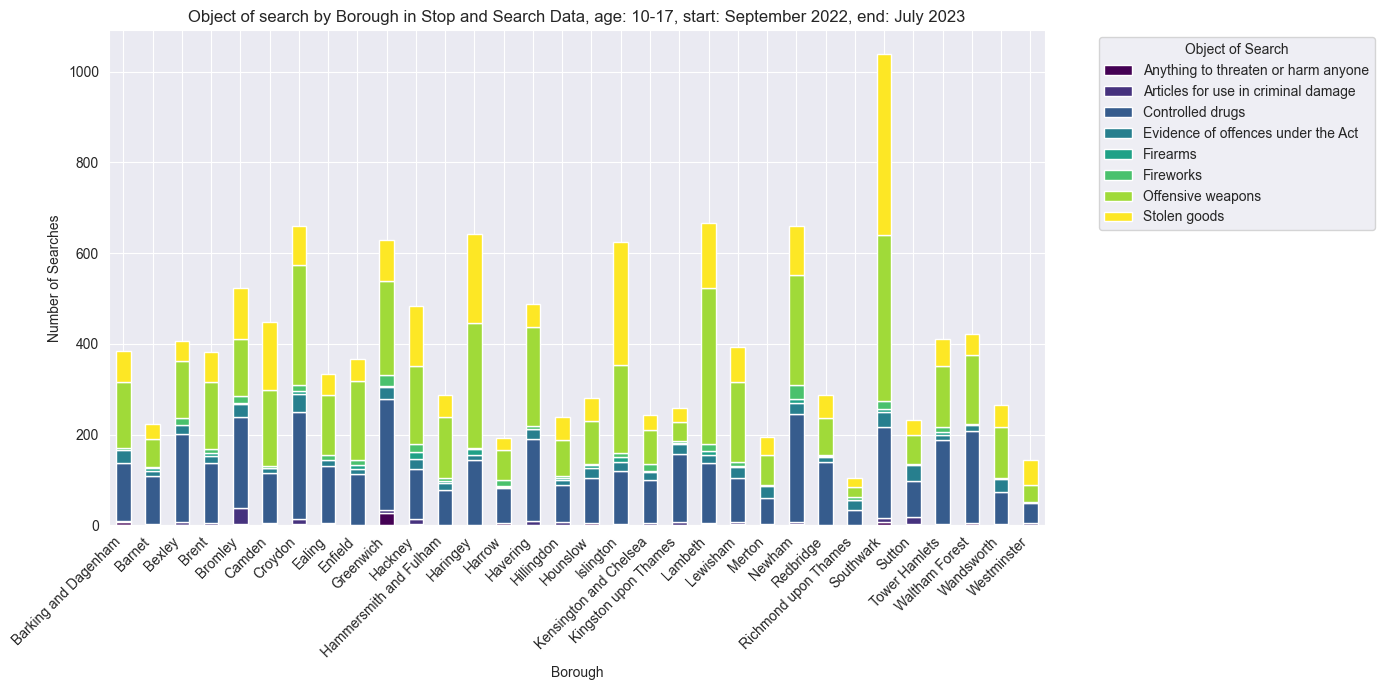

In [57]:
grouped_data = filtered_stop_and_search.groupby(['Borough', 'Object of search']).size().unstack(fill_value=0)
grouped_data = grouped_data.drop('Unknown')

# Stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')

# Adding titles and labels
plt.title('Object of search by Borough in Stop and Search Data, age: 10-17, start: September 2022, end: July 2023')
plt.xlabel('Borough')
plt.ylabel('Number of Searches')
plt.xticks(rotation=45, ha='right')  

# Showing the legend
plt.legend(title='Object of Search', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 


plt.show()


In [73]:
stop_and_search_agg = filtered_stop_and_search.groupby(['Borough', 'time_identifier']).size().reset_index(name='stop_search_count')

cme_agg = filtered_cme.groupby(['Borough', 'time_identifier'])['cme_census_date'].sum().reset_index(name='missing_children_count')
merged_data = pd.merge(stop_and_search_agg, cme_agg, on=['Borough', 'time_identifier'], how='inner')

correlation = merged_data['stop_search_count'].corr(merged_data['missing_children_count'])
print("The correlation between the number of stop and search incidents and the number of children missing education is:", correlation)


The correlation between the number of stop and search incidents and the number of children missing education is: 0.05101371601947501
